In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
FILE_PATH = 'data/exp1_main.json'
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
        e = entry['data']
len(all_entries)

2005

In [15]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

1074 931


In [4]:
a = []
b = [1,2,3,4]
b1 = [1,2,3,4]
a.append(b)
a.append(2*np.ones(5))
a = np.hstack(a)
a

array([1., 2., 3., 4., 2., 2., 2., 2., 2.])

In [16]:
#get data for each subject 
time_guess = [] 
actual_rt = []
aha = []
subject_id = []
anagram_id = []
give_up = []

sub = 0
for entry in finish: 
    sub = sub+1
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']

    anagram_id.append(idx)
    subject_id.append(sub*np.ones(5))
    counter = 3 #3 is first time quiz is given to subjects
    while '5' not in entry_data[counter]['responses']: #keep increasing counter everytime subject gets the quiz incorrectly
        counter = counter+2
    
    for j in range(5):
        counter = counter+3
        time_guess.append(entry_data[counter]['response'])

        counter = counter+1  
        rt = entry_data[counter]['rt']
        attempt = entry_data[counter]['responses'] 
        g = 0

        while anagrams_answers[j].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
            if "next" in attempt.lower(): #break if person gave up
                g = 1
                break
            else:                
                counter = counter+1
                attempt = entry_data[counter]['responses']
                rt = rt+entry_data[counter]['rt']  
        
        #if (rt*0.001)/60 > 3: #remove all responses greater than 3 minutes. 
        #    g = 1
        
        give_up.append(g)
        actual_rt.append(rt) #append actual time to complete
        counter = counter+1    
        r = entry_data[counter]['responses'] #aha rating
        aha.append(int(r[6]))


In [17]:
#data conversion, clean-up, and storage here
time_guess = np.hstack(np.asarray(time_guess, dtype='float64'))*(3/100)*(60) 
actual_rt = np.hstack(np.asarray(actual_rt, dtype='float64'))*0.001
aha = np.hstack(np.asarray(aha, dtype='float64')) 
subject_id = np.hstack(subject_id) 
anagram_id = np.hstack(anagram_id) 
give_up = np.hstack(give_up) 
tpe = time_guess - actual_rt

indexes = [i for i,x in enumerate(give_up) if x == 0] #only get subjects who solved the anagram    

aha = aha[np.asarray(indexes)] 
time_guess = time_guess[np.asarray(indexes)] 
actual_rt = actual_rt[np.asarray(indexes)] 
tpe = tpe[np.asarray(indexes)]
subject_id = subject_id[np.asarray(indexes)]
anagram_id = anagram_id[np.asarray(indexes)]



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tpe   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     41.27
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           4.04e-49
Time:                        12:29:11   Log-Likelihood:                -4571.4
No. Observations:                4198   AIC:                             9157.
Df Residuals:                    4191   BIC:                             9201.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2151      0.027      8.032      0.000       0.163       0.268
C(aha)[T.1.0]     0.1347      0.041      3.258      0.001       0.054       0.216
C(aha)[T.2.0]     0.3617      0.046      7.840      0.000       0.271       0.452
C(aha)[T.3.0]     0.3946      0.043      9.142      0.000       0.310       0.479
C(aha)[T.4.0]     0.4747      0.039     12.095      0.000       0.398       0.552
C(aha)[T.5.0]     0.4739      0.039     12.225      0.000       0.398       0.550
C(aha)[T.6.0]     0.3771      0.036     10.346      0.000       0.306       0.449
==============================================================================
Omnibus:                      737.491   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1239.082
Skew:                           1.158   Prob(JB):                    8.64e-270
Kurtosis:                       4.310   Cond. No.                         7.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

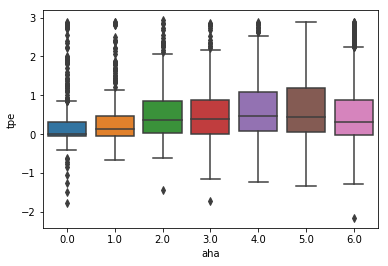

In [7]:
#do box plot and anova of all data for each aha rating
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'anagram_id': anagram_id, 'subject_id': subject_id,
    'tpe': tpe/60,
    'aha': aha,
    'estimate': time_guess/60,
     'rt':  actual_rt/60})

sns.boxplot(x=df["aha"], y=df["tpe"])

stats.f_oneway(df['tpe'][df['aha'] == 0], 
             df['tpe'][df['aha'] == 1],
             df['tpe'][df['aha'] == 2],
             df['tpe'][df['aha'] == 3],
             df['tpe'][df['aha'] == 4],
             df['tpe'][df['aha'] == 5],
             df['tpe'][df['aha'] == 6])

results = ols('tpe ~ C(aha)', data=df).fit()
results.summary()

In [9]:
import statsmodels.api as sm                                                                                               

df["group"] = 1                                                                                                            

vcf = {"subject_id": "0 + C(subject_id)", "anagram_id": "0 + C(anagram_id)"}                                                         
model = sm.MixedLM.from_formula("aha ~ tpe + estimate + rt", groups="group",                                                    
                                vc_formula=vcf, re_formula="0", data=df)                                                   
result = model.fit()  
result.summary()

LinAlgError: Singular matrix

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 3.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 4.00e+00,
        0.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 3.00e+00, 4.00e+00,
        4.00e+00, 1.10e+01, 1.30e+01, 1.30e+01, 1.40e+01, 2.60e+01,
        5.00e+01, 1.03e+03, 5.66e+02, 3.35e+02, 5.30e+02, 1.66e+02,
        1.62e+02, 3.18e+02, 1.58e+02, 7.30e+01, 

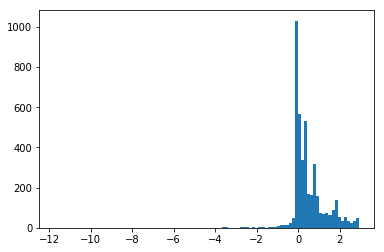

In [22]:
plt.hist(tpe/60, bins=100)